# MNIST CNN Demo
For October 6, first meeting of 2019

[Accompanying slide deck](https://docs.google.com/presentation/d/13ewAMTxERtJysMe7vXtUkgjUrm79vUUZCvlywi63zSs/edit?usp=sharing)

Jupyter notebook to demo a CNN using the MNIST dataset. Code from 5.1-introduction-to-convnets.ipynb from Francois Chollet's [Deep Learning with Python Notebooks repository](https://github.com/fchollet/deep-learning-with-python-notebooks).

### Imports

In [1]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading the Dataset

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

What did we just load?

In [70]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

That looked like gibberish, but each index in train_images or test_images represents one 28 by 28 image. We can recover the image by plotting with matplotlib.

In [34]:
def view_image(image_list, image_to_view):
    # plot the image at a certain index ("image_to_view") in a list of images ("image_list")
    first_image = np.array(image_list[image_to_view], dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

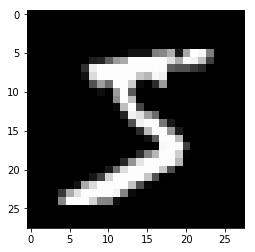

In [40]:
view_image(train_images, 0) # 

### Building the model
We aren't going to discuss the specifics of CNN architecture today, but here is what you need to know for this example.

![title](img/mnist_arch.jpg)

* Input: 28x28 array where each number represents 1 grayscale pixel (0 means black, 1 means white)
* Output: array of length 10 where each index represents the likelihood, according to the model, that the image is a certain digit 0-9

You can think of it as if the layers in between "purify" the information and distill it into a prediction in the last layer.

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # first layer, takes in input
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # the output layer, outputs list of length 10
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training
Keras performs all model training under the hood, and we only have to call this one little function. Notice that we only pass in the training labels.

In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 53s 877us/step - loss: 0.1684 - acc: 0.9482
Epoch 2/5
60000/60000 [==============================] - 59s 990us/step - loss: 0.0452 - acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 56s 929us/step - loss: 0.0313 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 55s 915us/step - loss: 0.0240 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0192 - acc: 0.9940


Now, we have a trained model. Let's see how it works on individual samples in the test dataset. 

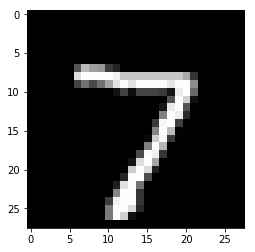

In [61]:
test_image_index = 0 # which test image to use
view_image(test_images, test_image_index)

This is the raw output from the model's prediction (an array of length 10 of the probability):

In [62]:
probabilities = model.predict(np.array([test_images[test_image_index]]))[0]
probabilities

array([1.07640025e-12, 6.74923506e-10, 1.97452277e-09, 2.32658294e-07,
       3.67936168e-11, 9.27026095e-11, 1.18486633e-17, 9.99999046e-01,
       1.16336794e-10, 7.69947576e-07], dtype=float32)

It's a little hard to read, so let's clean it up a little bit.

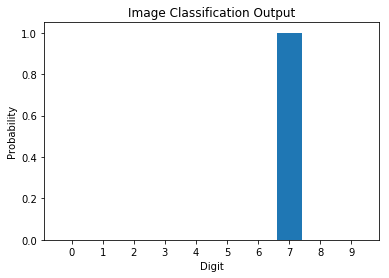

In [69]:
plt.bar(range(10), probabilities)
plt.title('Image Classification Output')
plt.xticks(range(10), range(10))
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.show()

The model predicts the correct digit with almost 100% certainty.

### Model Testing
Let's see how this model does over the entire test dataset.

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 351us/step


In [6]:
test_acc

0.9917

99% accuracy! Using Keras, you have so much power under the hood.